# Олимпиада: Я - профессионал 2020
## Секция - Машинное обучение
### Отборочный этап
#### Задача №2
Из-за сильнейшего ливня в лаборатории квантовой механики произошёл потоп, вследствие чего она была закрыта на срочный ремонт. Однако учёные привыкли доводить все свои дела до конца, и ждать пока закончится ремонт были не намерены. Перед ними стояла задача определить критические температуры для сверхпроводников, созданных на основе различных химических элементов. Однако никаких привычных лабораторных приспособлений для этого не имелось, существовала только информация о характеристиках каждого из сверхпроводников и химические формулы сверхпроводников, которую им подсказали ученые-химики из соседней лаборатории. В поисках решения они решили изучить новейшие технологии в области анализа данных и обнаружили, что им может помочь машинное обучение. Помогите учёным-физикам, не имеющим опыта в решении задач машинного обучения, определить критические температуры всех сверхпроводников используя их характеристики и химический состав. Для обучения моделей необходимо воспользоваться информацией о сверхпроводниках, для которых ученые успели получить критическую температуру (train.csv). Возможно сделать предсказание более эффективным вам поможет химическая формула для каждого из сверхпроводников (formula_train.csv). Целевым полем является поле critical_temperature. Ваша задача для недостающих соединений (test.csv) предсказать поле critical_temperature и в качестве ответа загрузить файл answer.csv, где будет одна колонка с предсказанием (без заголовка колонки).

Выходные данные: вам следует загрузить файл answer.csv, где будет одна колонка с предсказанием поля critical_temperature для файла test.csv (без заголовка колонки).

In [65]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

In [66]:
data = pd.read_csv('D:\\DataMining\\critical_temperature\\train.csv')
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,critical_temperature
0,4,95.950150,87.221940,89.534122,81.423258,1.317590,1.301059,96.1190,20.285800,36.105357,...,4.10,4.053600,3.944244,1.339718,1.245504,3,1.400000,1.299038,1.135782,21.50
1,5,83.244760,59.224400,59.506081,36.126175,1.311510,1.372050,192.9810,25.192187,67.233835,...,2.40,2.402249,2.259897,1.519383,1.365077,3,0.933333,1.200000,1.019804,62.00
2,2,23.035850,26.647510,21.192566,25.010514,0.614232,0.435817,18.0583,18.243490,9.029150,...,5.10,4.242641,4.873514,0.636514,0.465999,3,3.300000,1.500000,1.374773,0.29
3,4,81.756699,79.833804,76.282833,75.275775,1.312596,1.149324,81.4820,28.789976,32.890369,...,3.62,3.309751,3.413039,1.333736,1.019322,3,1.920000,1.118034,1.198165,19.50
4,2,67.485250,69.699016,57.442709,59.574464,0.548263,0.521345,70.8405,39.638078,35.420250,...,6.00,6.000000,6.000000,0.693147,0.691193,0,0.375000,0.000000,0.000000,5.36


In [67]:
data.shape

(17000, 82)

In [68]:
data_formula = pd.read_csv('D:\\DataMining\\critical_temperature\\formula_train.csv')
data_formula.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Eu1Fe1.5Ru0.5As2
1,0.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,Bi2Sr2Ca1Cu2O8
2,0.0,0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,N0.3S0.7
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba1Fe1.9Co0.1As2
4,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Rh17S15


In [69]:
data_formula[['Bi', 'Sr', 'Ca', 'Cu','O','N','S']][1:3]

,Bi,Sr,Ca,Cu,O,N,S
1,2.0,2.0,1.0,2.0,8.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.3,0.7


In [70]:
data_formula.shape

(17000, 87)

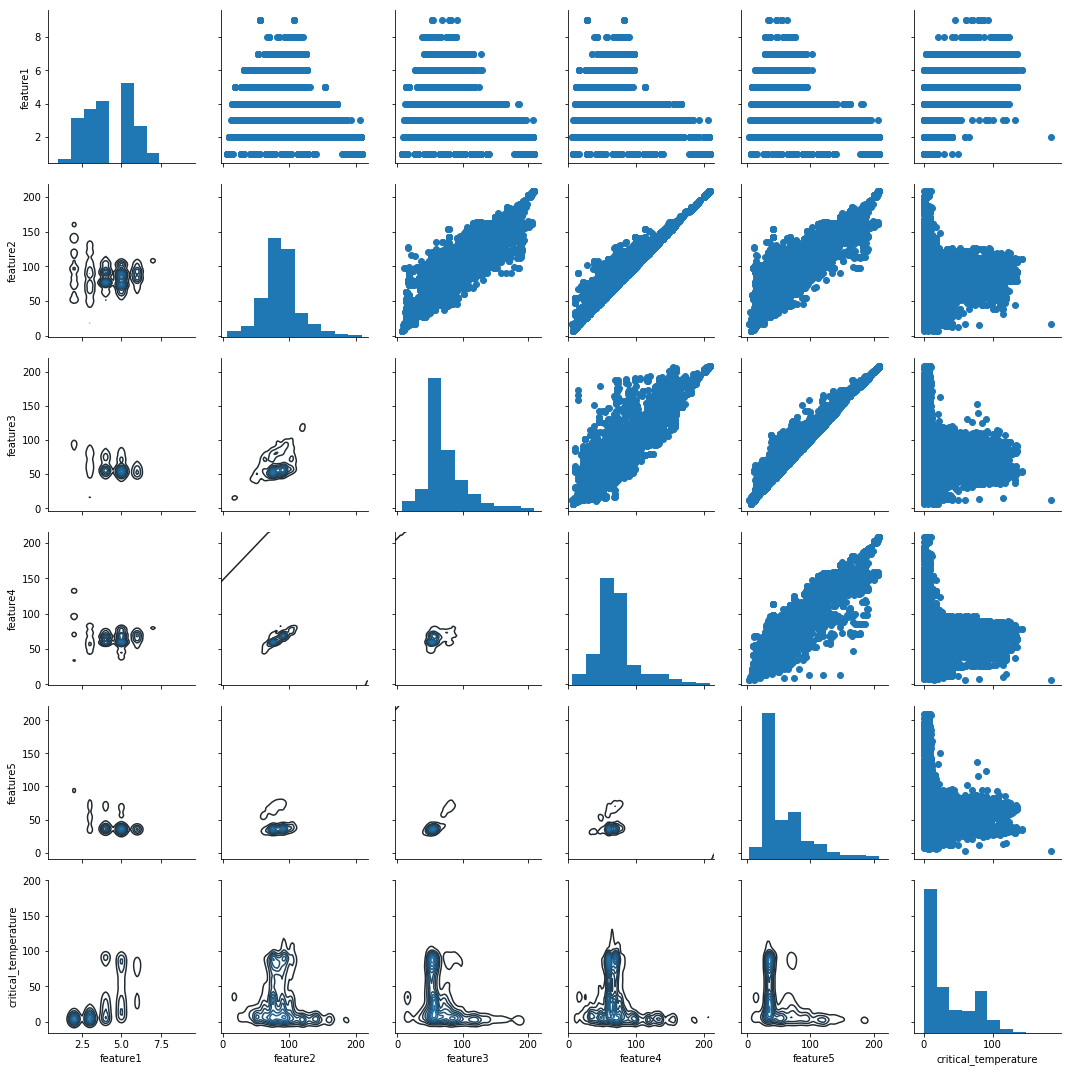

In [16]:
g = sns.PairGrid(data[['feature1','feature2','feature3','feature4','feature5', 'critical_temperature']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [71]:
from sklearn.decomposition import PCA
from scipy import stats

target = data['critical_temperature']
del data['critical_temperature']

In [72]:
x = stats.zscore(data, ddof = 1)
x

array([[-0.07807778,  0.28060129,  0.42127643, ..., -0.08494918,
         0.94649974,  1.00990396],
       [ 0.6179486 , -0.14746072, -0.41240245, ..., -0.56100236,
         0.74232014,  0.75573515],
       [-1.47013054, -2.17598146, -1.38244   , ...,  1.85326737,
         1.36080813,  1.53366011],
       ...,
       [-1.47013054,  1.95505739,  3.2230427 , ...,  3.38343832,
        -1.73163181, -1.47919618],
       [-0.07807778,  0.14104995, -0.48397603, ..., -0.6749004 ,
        -0.83892129, -0.88958173],
       [ 0.6179486 , -0.37830699,  0.20210327, ...,  0.51242956,
         0.37082307,  1.14346342]])

X explained ratio:  [3.89458126e-01 1.04258841e-01 9.48066643e-02 7.92934076e-02
 5.90840248e-02 3.78844284e-02 3.61699635e-02 3.11413253e-02
 2.33642880e-02 1.99453078e-02 1.84026132e-02 1.47211337e-02
 1.17414179e-02 1.01151555e-02 9.96514162e-03 7.73142743e-03
 7.20895970e-03 5.45937595e-03 4.83269527e-03 3.82698501e-03
 3.01690384e-03 2.88536274e-03 2.55236087e-03 2.06732579e-03
 1.95453943e-03 1.83609102e-03 1.70537454e-03 1.44484232e-03
 1.27268925e-03 1.15987350e-03 1.01416707e-03 9.59011756e-04
 9.18265044e-04 7.13872331e-04 6.75984786e-04 6.29430591e-04
 5.65830295e-04 4.91382956e-04 4.32856832e-04 4.24068490e-04
 3.24863720e-04 3.05694787e-04 2.57888866e-04 2.33889814e-04
 2.23415112e-04 2.14409637e-04 1.99669401e-04 1.88057521e-04
 1.81139809e-04 1.74303085e-04 1.57324730e-04 1.53787019e-04
 1.27325455e-04 1.19154357e-04 1.16880076e-04 1.05035326e-04
 8.94845771e-05 8.02612739e-05 7.93156556e-05 7.04299571e-05
 6.43054011e-05 5.63755158e-05 4.39884252e-05 4.33344003e-05
 3.8

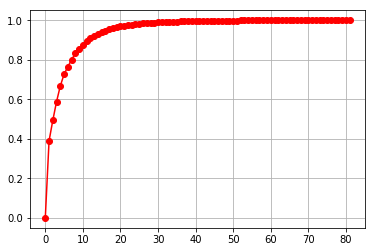

In [73]:
pca = PCA(svd_solver='full')
pca.fit(x)
print('X explained ratio: ', pca.explained_variance_ratio_)

var_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0, 82), np.append(0, var_cumsum), marker='o', color="red")
plt.grid()
plt.show()

X explained ratio:  [0.38945813 0.10425884 0.09480666 0.07929341 0.05908402 0.03788443
 0.03616996 0.03114133 0.02336429 0.01994531 0.01840261 0.01472113
 0.01174142 0.01011516 0.00996514 0.00773143 0.00720896 0.00545938
 0.0048327  0.00382699 0.0030169  0.00288536 0.00255236 0.00206733
 0.00195454 0.00183609 0.00170537 0.00144484 0.00127269 0.00115987]


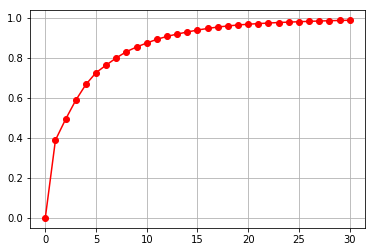

In [84]:
pca = PCA(svd_solver='full', n_components = 30)
pca.fit(x)
print('X explained ratio: ', pca.explained_variance_ratio_)

var_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0, 31), np.append(0, var_cumsum), marker='o', color="red")
plt.grid()
plt.show()

In [85]:
x_pca = pca.transform(x)
x_pca

array([[ 2.19284630e+00, -2.40884697e+00,  3.18019658e+00, ...,
        -3.58878594e-01, -4.09789393e-02,  1.67770299e-01],
       [-5.23157155e+00, -2.06886512e-01,  3.42341056e-01, ...,
        -1.18083185e-01, -2.76265971e-02,  4.84167111e-04],
       [ 3.17976280e+00,  1.01451031e+01, -1.00825939e+00, ...,
         4.88592331e-01,  1.13105268e+00,  5.70309994e-01],
       ...,
       [ 1.46008244e+01, -4.64637858e+00,  4.52348436e-01, ...,
         1.89610737e-01, -8.93146962e-01, -8.20508928e-01],
       [-4.20157407e+00,  4.72053481e-01, -2.93806750e+00, ...,
         1.21820536e-01, -9.39553026e-03,  6.34057765e-02],
       [ 1.53560216e+00, -2.33285454e+00,  2.04122465e+00, ...,
        -2.63956132e-01,  5.89792764e-02, -1.02340079e-01]])

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, target, test_size=0.2, random_state=77)

In [87]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test,y_test)

0.6767078775959509

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=77)

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test,y_test)

0.7384183534130448

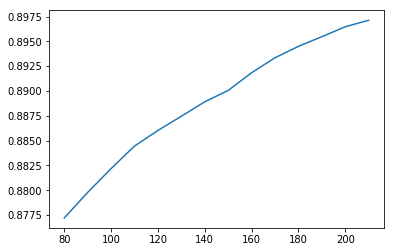

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
r = []
for i in range(80,220,10):
    gbc = GradientBoostingRegressor(n_estimators = i, learning_rate = 0.1, max_depth = 4, random_state = 5)
    gbc.fit(X_train,y_train)
    r.append(gbc.score(X_test, y_test))
plt.plot(range(80,220,10), r)
plt.show()

In [99]:
gbc = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.3, max_depth = 4, random_state = 5)
gbc.fit(X_train,y_train)
gbc.score(X_test, y_test)

0.9078032121600179

In [100]:
test = pd.read_csv('D:\\DataMining\\critical_temperature\\test.csv')
test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81
0,5,82.324574,88.533544,64.110667,72.640059,1.418486,1.179961,122.90607,38.757614,48.331141,...,2.4,2.151429,2.352158,2.126646,1.589027,1.361750,1,0.814286,0.489898,0.358466
1,4,115.438500,90.562624,107.211420,88.713057,1.308571,1.157701,122.45400,37.743936,47.516249,...,4.0,3.632000,3.722419,3.504866,1.320888,1.064083,4,1.504000,1.414214,0.853567
2,4,92.290900,83.842290,87.295606,79.318618,1.331889,1.300022,81.48200,20.872340,30.558629,...,4.0,3.870000,3.662842,3.611896,1.305096,1.193165,4,1.600000,1.581139,1.361286
3,5,72.324650,51.227894,58.637102,34.924853,1.444612,1.306314,121.32760,20.998358,40.053512,...,2.4,2.079231,2.352158,2.065294,1.589027,1.219461,1,1.070000,0.489898,0.270099
4,4,90.142263,58.462879,66.935044,36.272055,1.178649,1.019134,124.90825,34.237393,53.101375,...,3.0,2.571429,2.828427,2.438027,1.329661,1.083356,2,1.057143,1.000000,0.903508


In [145]:
#data = pd.read_csv('D:\\DataMining\\critical_temperature\\train.csv')

grad_boost = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.3, max_depth = 5, random_state = 12)
grad_boost.fit(data,target)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=250,
                          random_state=12)

In [146]:
res_grad_boost = grad_boost.predict(test)
res_grad_boost

array([51.65657107,  5.58073134, 21.80197056, ..., 33.78433218,
       26.39375616,  7.98745161])

In [107]:
del data_formula['material']


X explained ratio:  [0.17901851 0.14820924 0.13229471 0.1051311  0.08411902 0.04261974
 0.03993664 0.03424972 0.03100034 0.02548892 0.02310997 0.01484147
 0.01338722 0.01283221 0.01071229 0.00810662 0.00739277 0.00682492
 0.00667424 0.00587838 0.00550182 0.00525296 0.00511743 0.00496953
 0.00478069 0.00467444 0.00419908 0.00387246 0.00359389 0.0027695 ]


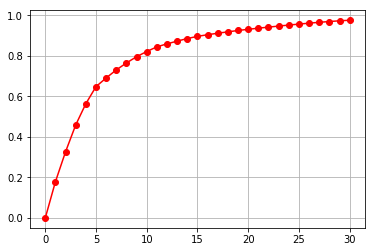

In [113]:
pca = PCA(svd_solver='full', n_components = 30)
pca.fit(data_formula)
print('X explained ratio: ', pca.explained_variance_ratio_)

var_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0, 31), np.append(0, var_cumsum), marker='o', color="red")
plt.grid()
plt.show()

In [135]:
data_ = pd.read_csv('D:\\DataMining\\critical_temperature\\train.csv')
del data_['critical_temperature']
for_join = pd.DataFrame(pca.transform(data_formula), columns=[str(i) for i in range(30)])
data_ = pd.DataFrame(data_.join(for_join))

data_.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,20,21,22,23,24,25,26,27,28,29
16995,3,72.816957,57.907791,52.075936,36.128407,0.838545,0.840863,122.906070,30.609277,50.602625,...,-0.054036,-0.013526,0.056646,-0.005662,-0.059025,0.031030,-0.064164,-0.005871,-0.063721,0.056489
16996,6,70.527467,91.385775,41.594713,59.041700,1.373685,1.177703,202.039400,51.551000,67.643464,...,0.135101,0.102677,0.000218,-0.315260,0.058467,-0.101172,-0.038634,-0.022904,-0.233174,-0.174005
16997,2,145.650000,181.314000,138.659822,178.571988,0.645546,0.215090,89.160000,161.100000,44.580000,...,-0.094721,0.085620,0.100382,0.030392,-0.034187,-0.027923,-0.054756,-0.012731,-0.141310,0.000455
16998,4,91.808100,56.820735,67.689303,37.015522,1.173514,1.329216,134.360600,13.116892,54.877137,...,-0.040646,-0.047712,0.021925,0.069647,-0.101695,0.004013,-0.003604,-0.007464,0.013496,-0.002248
16999,5,76.392968,79.861421,71.435829,75.311863,1.535661,1.183003,82.388955,29.770863,31.312929,...,-0.042164,-0.013988,0.088087,0.047275,-0.181950,0.013861,-0.113596,-0.018871,-0.121488,0.041168


In [141]:
from sklearn.ensemble import RandomForestRegressor

gbc = RandomForestRegressor(n_estimators = 250, random_state = 12)
gbc.fit(data_,target)

RandomForestRegressor(n_estimators=250, random_state=12)

In [142]:
data_formula_test = pd.read_csv('D:\\DataMining\\critical_temperature\\formula_test.csv')
del data_formula_test['material']
for_join_test = pd.DataFrame(pca.transform(data_formula_test), columns=[str(i) for i in range(30)])
test_ =  pd.DataFrame(test.join(for_join_test))
res = gbc.predict(test_)
res

array([51.73260857,  3.06586667, 15.07744   , ..., 33.6628784 ,
       27.14608   ,  6.56449124])

In [147]:
res = (res+res_grad_boost)/2

In [148]:
import csv

res_file = open('D:\\DataMining\\critical_temperature\\answer.csv', "w",newline='') 
writer = csv.writer(res_file, delimiter =',')
for answer in res:
    writer.writerow([answer])
res_file.close()